In [2]:
import validation_utils as vu
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import math
import sys
import time
import os
import powerlaw

# Recommendation Network

# 1.0 Bookcorssing

In [2]:
bookcorssing = vu.dataset_rs("bookcorssing")

Start reading from bookcorssing
1000000
finish init recommendation system dataset


In [3]:
degitem, weiitem, xinditem = bookcorssing.get_distribution("item")
deguser, weiuser, xinduser = bookcorssing.get_distribution("user")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acemap/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/acemap/.local/lib/python3.6/site-packages/powerlaw.py:1605: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acemap/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


user p_value: 0.0746458435747715 user alpha: 1.4445012525411212 user xmin: 90.0
user p_value: 0.802294712479605 user alpha: 1.7976899546835798 user xmin: 2.0


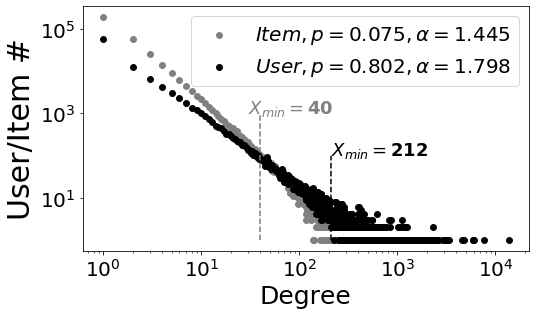

In [4]:
plt.rcParams['figure.figsize'] = (8, 4.5)
# print(len(degitem))
data1 = degitem
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 1000, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,1000),xytext=(30,1000),fontsize=18,weight='bold',color='grey')

data2 = deguser
results2 = powerlaw.Fit(data2[20:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 100, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],100),xytext=(xinduser[list(data2).index(xmin2)],100),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/bookcorssing_deg.png', dpi=300, bbox_inches='tight')

plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.8849046218603192 user alpha: 1.4848897564742434 user xmin: 6.0
user p_value: 0.6936770484658241 user alpha: 1.6280020878453525 user xmin: 3.0


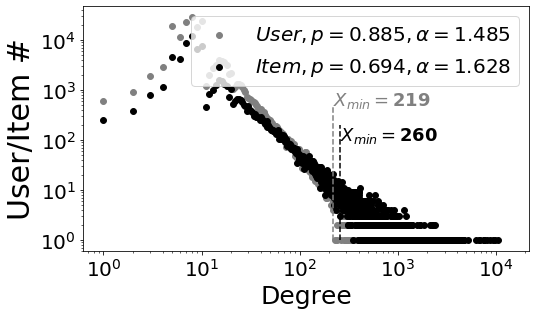

In [5]:
plt.rcParams['figure.figsize'] = (8, 4.5)

data1 = weiitem[:len(xinditem)]
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 500, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,500),xytext=(xinditem[list(data1).index(xmin1)],500),fontsize=18,weight='bold',color='grey')

data2 = weiuser[:len(xinduser)]
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 200, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],100),xytext=(xinduser[list(data2).index(xmin2)],100),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/bookcorssing_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.1 Bookcorssing_r05

In [6]:
bookcorssing_r05 = vu.dataset_rs("bookcorssing_r05")

Start reading from bookcorssing_r05
finish init recommendation system dataset


In [7]:
degitem, weiitem, xinditem = bookcorssing_r05.get_distribution("item")
deguser, weiuser, xinduser = bookcorssing_r05.get_distribution("user")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.7316243009418203 user alpha: 12.26802892269165 user xmin: 1.0
user p_value: 0.9195330219532001 user alpha: 1.6085320633392746 user xmin: 29.0


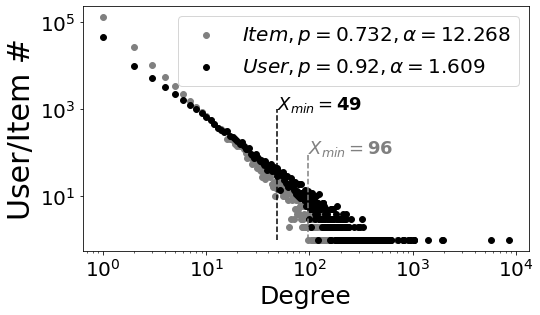

In [8]:
plt.rcParams['figure.figsize'] = (8, 4.5)
# print(len(degitem))
data1 = degitem
results1 = powerlaw.Fit(data1[200:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

data2 = deguser
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/bookcorssing_r05_deg.png', dpi=300, bbox_inches='tight')

plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.8544762077020487 user alpha: 1.4885529261057422 user xmin: 2.0
user p_value: 0.5950652837368064 user alpha: 1.5912479386559297 user xmin: 6.0


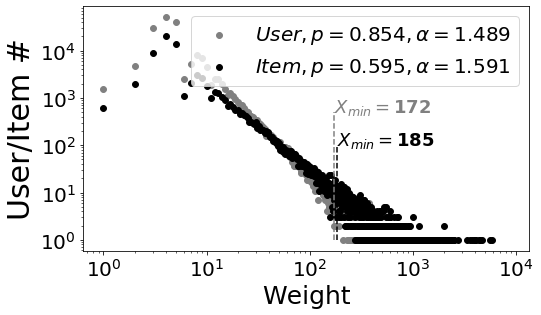

In [9]:
plt.rcParams['figure.figsize'] = (8, 4.5)

data1 = weiitem[:len(xinditem)]
results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 500, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,500),xytext=(xinditem[list(data1).index(xmin1)],500),fontsize=18,weight='bold',color='grey')

data2 = weiuser[:len(xinduser)]
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 100, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],100),xytext=(xinduser[list(data2).index(xmin2)],100),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/bookcorssing_r05_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.2 Bookcorssing_r10

In [10]:
bookcorssing_r10 = vu.dataset_rs("bookcorssing_r10")

Start reading from bookcorssing_r10
finish init recommendation system dataset


In [11]:
degitem, weiitem, xinditem = bookcorssing_r10.get_distribution("item")
deguser, weiuser, xinduser = bookcorssing_r10.get_distribution("user")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.7798991042668636 user alpha: 1.459381605468104 user xmin: 7.0
user p_value: 0.9195409394515172 user alpha: 1.6085305041404672 user xmin: 29.0


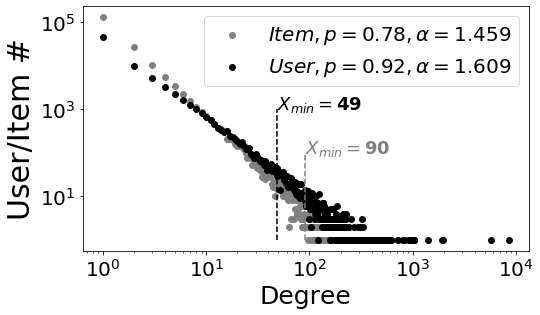

In [12]:
plt.rcParams['figure.figsize'] = (8, 4.5)
# print(len(degitem))
data1 = degitem
results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

data2 = deguser
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/bookcorssing_r10_deg.png', dpi=300, bbox_inches='tight')

plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.8866362252074002 user alpha: 1.4849639728121888 user xmin: 6.0
user p_value: 0.797908442028132 user alpha: 1.664911753185021 user xmin: 3.0


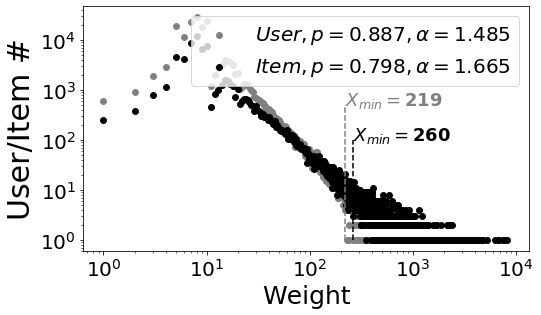

In [13]:
plt.rcParams['figure.figsize'] = (8, 4.5)

data1 = weiitem[:len(xinditem)]
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 500, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,500),xytext=(xinditem[list(data1).index(xmin1)],500),fontsize=18,weight='bold',color='grey')

data2 = weiuser[:len(xinduser)]
results2 = powerlaw.Fit(data2[10:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 100, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],100),xytext=(xinduser[list(data2).index(xmin2)],100),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/bookcorssing_r10_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 2 Audioscrobbler

In [14]:
audioscrobbler = vu.dataset_rs("audioscrobbler")

Start reading from audioscrobbler
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
finish init recommendation system dataset


In [15]:
degitem, weiitem, xinditem = audioscrobbler.get_distribution("item")
deguser, weiuser, xinduser = audioscrobbler.get_distribution("user")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.9314464845784169 user alpha: 1.5791867233877372 user xmin: 25.0
user p_value: 0.9115766179898106 user alpha: 4.86252040776988 user xmin: 709.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


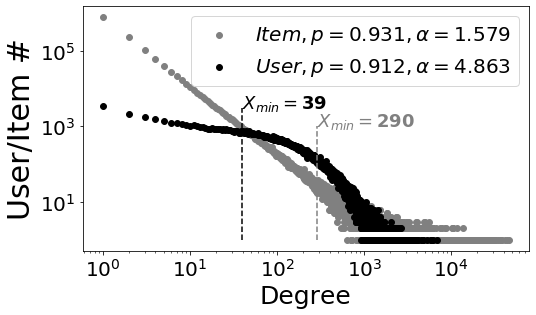

In [16]:
plt.rcParams['figure.figsize'] = (8, 4.5)
# print(len(degitem))
data1 = degitem
results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 1000, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],1000),xytext=(xinditem[list(data1).index(xmin1)],1000),fontsize=18,weight='bold',color='grey')

data2 = deguser
results2 = powerlaw.Fit(data2[2:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 3000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],3000),xytext=(xinduser[list(data2).index(xmin2)],3000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/audiosrobbler_deg.png', dpi=300, bbox_inches='tight')
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.16410442136451686 user alpha: 1.6163425050236502 user xmin: 6.0
user p_value: 0.6853049799343489 user alpha: 4.003016329563669 user xmin: 262.0


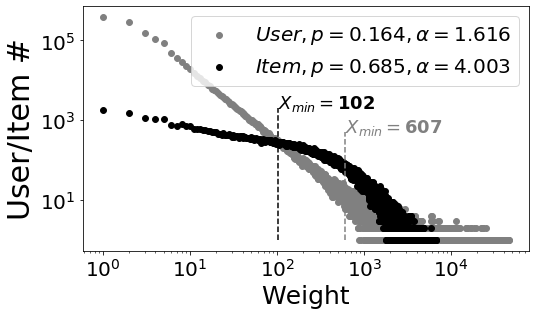

In [17]:
plt.rcParams['figure.figsize'] = (8, 4.5)

data1 = weiitem[:len(xinditem)]
results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 500, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,500),xytext=(xinditem[list(data1).index(xmin1)],500),fontsize=18,weight='bold',color='grey')

data2 = weiuser[:len(xinduser)]
results2 = powerlaw.Fit(data2[2:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 2000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],2000),xytext=(xinduser[list(data2).index(xmin2)],2000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/audioscrobbler_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 3 AmazonBook

In [18]:
amazonbook = vu.dataset_rs("amazonbook")

Start reading from amazonbook
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
finish init recommendation system dataset


In [19]:
degitem, weiitem, xinditem = amazonbook.get_distribution("item")
deguser, weiuser, xinduser = amazonbook.get_distribution("user")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.9368994835559263 user alpha: 1.4521367479912468 user xmin: 4.0
user p_value: 0.8665659819597388 user alpha: 1.4285079111661743 user xmin: 21.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


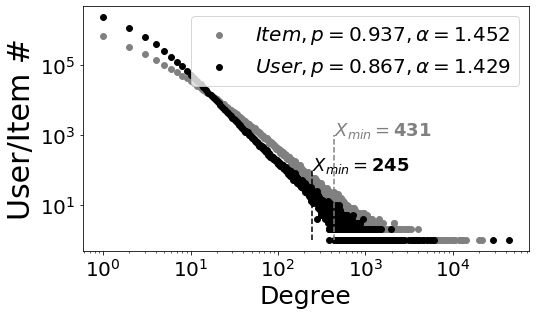

In [20]:
plt.rcParams['figure.figsize'] = (8, 4.5)
# print(len(degitem))
data1 = degitem
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 1000, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],1000),xytext=(xinditem[list(data1).index(xmin1)],1000),fontsize=18,weight='bold',color='grey')

data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 100, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],100),xytext=(xinduser[list(data2).index(xmin2)],100),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/amazonbook_deg.png', dpi=300, bbox_inches='tight')
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.23751687433605795 user alpha: 1.4770203234602337 user xmin: 4.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.9063684233766652 user alpha: 1.4389209045920783 user xmin: 6.0


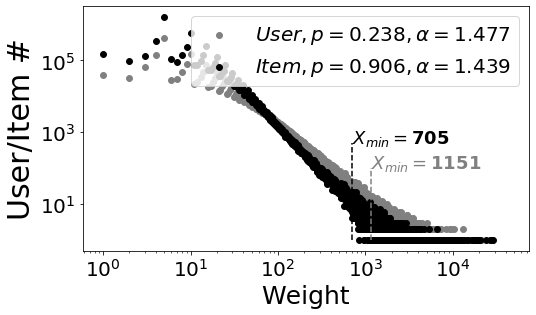

In [21]:
plt.rcParams['figure.figsize'] = (8, 4.5)

data1 = weiitem[:len(xinditem)]
results1 = powerlaw.Fit(data1[3:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

data2 = weiuser[:len(xinduser)]
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 500, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],500),xytext=(xinduser[list(data2).index(xmin2)],500),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/amazonbook_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 4 AmazonCD

In [22]:
amazoncd = vu.dataset_rs("amazoncd")

Start reading from amazoncd
1000000
2000000
3000000
finish init recommendation system dataset


In [23]:
degitem, weiitem, xinditem = amazoncd.get_distribution("item")
deguser, weiuser, xinduser = amazoncd.get_distribution("user")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.9832124485412927 user alpha: 1.5109519653683594 user xmin: 152.0
user p_value: 0.2702769209657988 user alpha: 1.4539031743692028 user xmin: 3.0


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


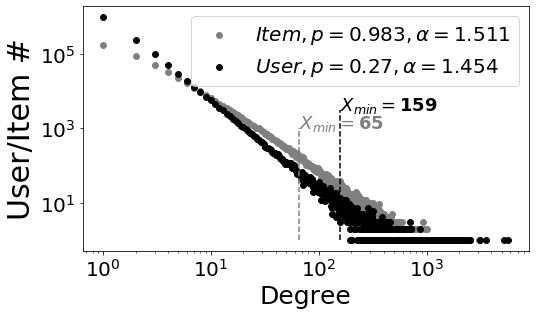

In [24]:
plt.rcParams['figure.figsize'] = (8, 4.5)
# print(len(degitem))
data1 = degitem
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 1000, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],1000),xytext=(xinditem[list(data1).index(xmin1)],1000),fontsize=18,weight='bold',color='grey')

data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 3000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],3000),xytext=(xinduser[list(data2).index(xmin2)],3000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/amazoncd_deg.png', dpi=300, bbox_inches='tight')
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.8883871276971638 user alpha: 1.5653757948325717 user xmin: 2.0
user p_value: 0.740194128976166 user alpha: 1.5510681124171382 user xmin: 2.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


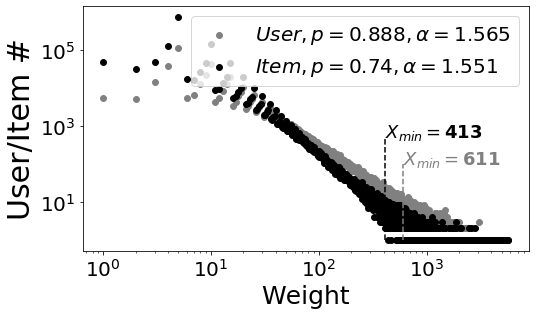

In [25]:
plt.rcParams['figure.figsize'] = (8, 4.5)

data1 = weiitem[:len(xinditem)]
results1 = powerlaw.Fit(data1[20:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

data2 = weiuser[:len(xinduser)]
results2 = powerlaw.Fit(data2[20:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 500, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],500),xytext=(xinduser[list(data2).index(xmin2)],500),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/amazoncd_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 5 Amazonelectronic

In [26]:
amazonelectronic = vu.dataset_rs("amazonelectronic")

Start reading from amazonelectronic
1000000
2000000
3000000
4000000
5000000
6000000
7000000
finish init recommendation system dataset


In [27]:
degitem, weiitem, xinditem = amazonelectronic.get_distribution("item")
deguser, weiuser, xinduser = amazonelectronic.get_distribution("user")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.8500157965458133 user alpha: 1.5281362162831678 user xmin: 3.0
user p_value: 0.6589051398103151 user alpha: 1.3231749515541968 user xmin: 46.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


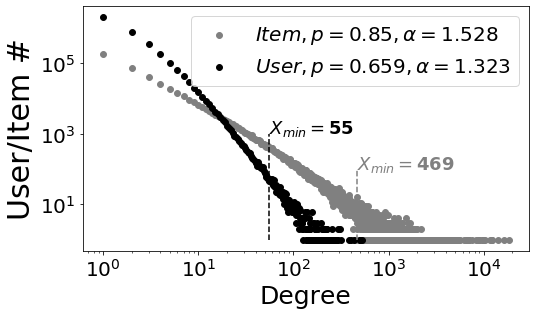

In [28]:
plt.rcParams['figure.figsize'] = (8, 4.5)
# print(len(degitem))
data1 = degitem
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/amazonelectronic_deg.png', dpi=300, bbox_inches='tight')
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.6939620491487035 user alpha: 1.6117528352487753 user xmin: 54.0
user p_value: 0.4825726011734385 user alpha: 1.327486579992521 user xmin: 2.0


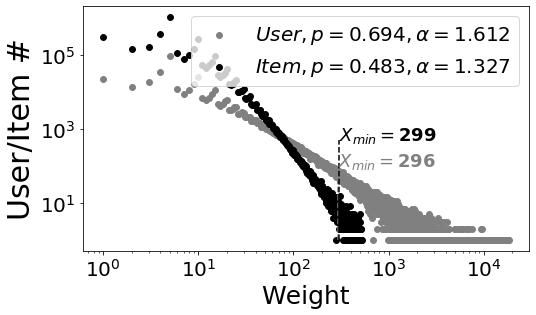

In [29]:
plt.rcParams['figure.figsize'] = (8, 4.5)

data1 = weiitem[:len(xinditem)]
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

data2 = weiuser[:len(xinduser)]
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 500, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],500),xytext=(xinduser[list(data2).index(xmin2)],500),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/amazonelectronic_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 6 Amazonmovie

In [30]:
amazonmovie = vu.dataset_rs("amazonmovie")

Start reading from amazonmovie
1000000
2000000
3000000
4000000
finish init recommendation system dataset


In [31]:
degitem, weiitem, xinditem = amazonmovie.get_distribution("item")
deguser, weiuser, xinduser = amazonmovie.get_distribution("user")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.22671180374528332 user alpha: 1.634248423630794 user xmin: 6.0
user p_value: 0.8563824814415967 user alpha: 1.4072220987044157 user xmin: 22.0


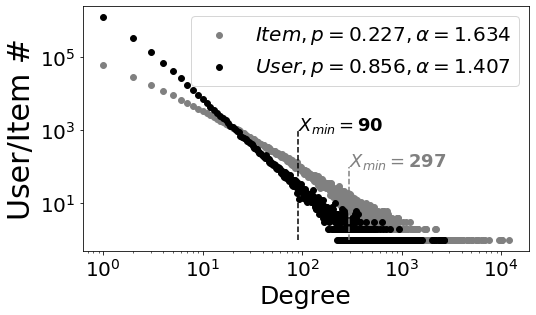

In [32]:
plt.rcParams['figure.figsize'] = (8, 4.5)
# print(len(degitem))
data1 = degitem
results1 = powerlaw.Fit(data1[10:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/amazonmovie_deg.png', dpi=300, bbox_inches='tight')
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.9538802207452196 user alpha: 1.6765258858383671 user xmin: 41.0
user p_value: 0.6533284375364818 user alpha: 1.428888034451875 user xmin: 8.0


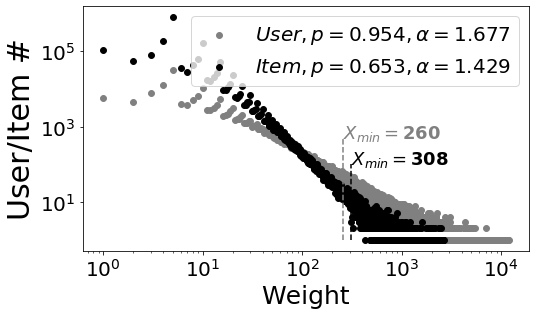

In [33]:
plt.rcParams['figure.figsize'] = (8, 4.5)

data1 = weiitem[:len(xinditem)]
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinditem)],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 500, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,500),xytext=(xinditem[list(data1).index(xmin1)],500),fontsize=18,weight='bold',color='grey')

data2 = weiuser[:len(xinduser)]
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 100, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],100),xytext=(xinduser[list(data2).index(xmin2)],100),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/amazonmovie_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 7 Algorithm

In [38]:
algorithm = vu.dataset_rs("algorithm")

Start reading from algorithm
1000000
2000000
3000000
finish init recommendation system dataset


In [39]:
degitem, weiitem, xinditem = algorithm.get_distribution("item")
deguser, weiuser, xinduser = algorithm.get_distribution("user")

257274
user p_value: 0.5832646131748553 user alpha: 2.624080041588451 user xmin: 3.0
146
user p_value: 0.689770200185184 user alpha: 1.3881243612436038 user xmin: 739.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


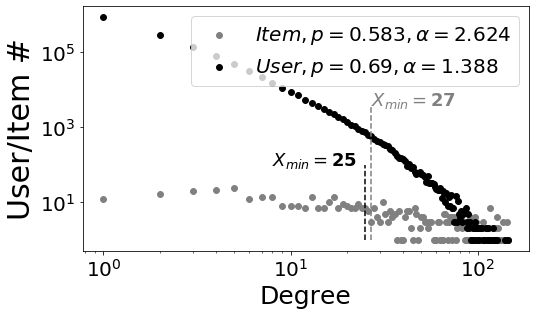

In [40]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem[:len(deguser)]
results1 = powerlaw.Fit(data1[2:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 4000, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],4000),xytext=(xinditem[list(data1).index(xmin1)],4000),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser[:len(degitem)]
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 100, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],100),xytext=(8,100),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/algorithm_deg.png', dpi=300, bbox_inches='tight')
plt.show()

460294
user p_value: 0.8440491433549113 user alpha: 2.532032414681126 user xmin: 3.0
20865
user p_value: 0.8462273749415186 user alpha: 1.4559973716975239 user xmin: 431.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acemap/.local/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


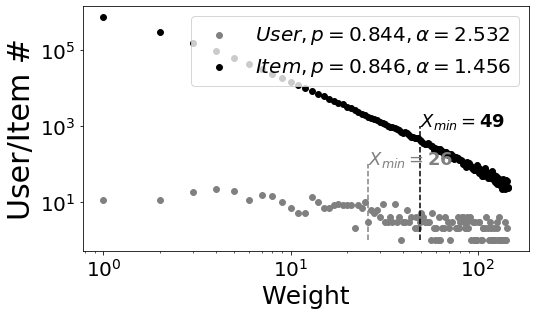

In [41]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
data1 = weiitem[:len(weiuser)]
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinduser[1:],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser[:len(weiitem)]
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/algorithm_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 8 Programminglanguage

In [42]:
programminglanguage = vu.dataset_rs("programminglanguage")

Start reading from programminglanguage
1000000
2000000
3000000
4000000
5000000
6000000
7000000
finish init recommendation system dataset


In [43]:
degitem, weiitem, xinditem = programminglanguage.get_distribution("item")
deguser, weiuser, xinduser = programminglanguage.get_distribution("user")

469205
user p_value: 0.9329808725268921 user alpha: 2.631054119580552 user xmin: 4.0
719
user p_value: 0.6448969434122642 user alpha: 1.3716549399621074 user xmin: 588.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


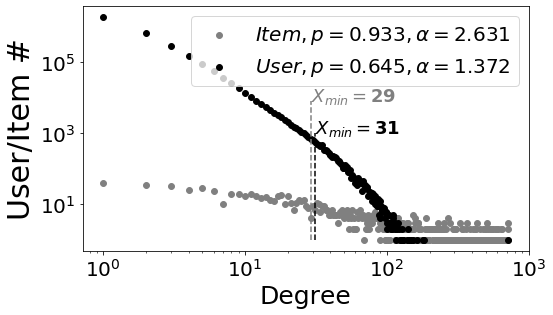

In [44]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem[:len(deguser)]
results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 8000, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],8000),xytext=(xinditem[list(data1).index(xmin1)],8000),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser[:len(degitem)]
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/programminglanguage_deg.png', dpi=300, bbox_inches='tight')
plt.show()

761025
user p_value: 0.6142049388597384 user alpha: 9.59974612616262 user xmin: 1.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


4195
user p_value: 0.7760780187181934 user alpha: 1.4283640275598126 user xmin: 295.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


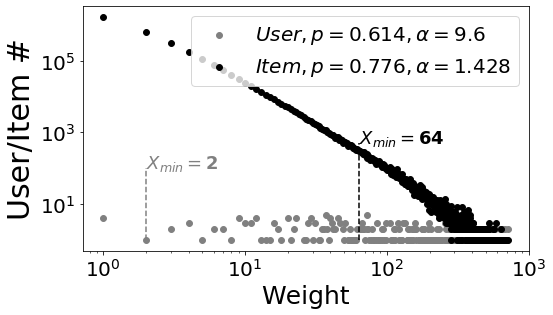

In [45]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
data1 = weiitem[100:]
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinduser[1:],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 500, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],500),xytext=(xinduser[list(data2).index(xmin2)],500),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/programminglanguage_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 9 Artificialintelligence

In [46]:
artificialintelligence = vu.dataset_rs("artificialintelligence")

Start reading from artificialintelligence
1000000
2000000
3000000
4000000
5000000
6000000
7000000
finish init recommendation system dataset


In [47]:
degitem, weiitem, xinditem = artificialintelligence.get_distribution("item")
deguser, weiuser, xinduser = artificialintelligence.get_distribution("user")

350671
user p_value: 0.8245178656069141 user alpha: 2.614341966665613 user xmin: 2.0
598
user p_value: 0.47074232515921377 user alpha: 1.3300475165086314 user xmin: 100.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


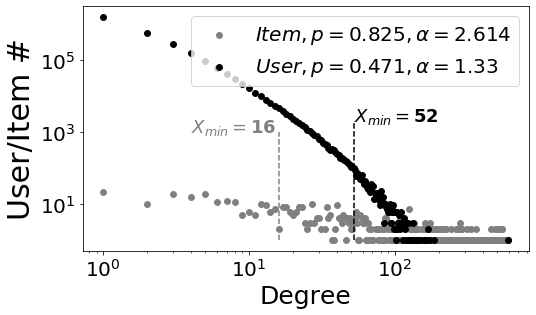

In [48]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem[:len(deguser)]
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 1000, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],1000),xytext=(xinditem[list(data1).index(xmin1)]-12,1000),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser[:len(degitem)]
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 2000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],2000),xytext=(xinduser[list(data2).index(xmin2)],2000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/ai_deg.png', dpi=300, bbox_inches='tight')
plt.show()

699475
user p_value: 0.8155395253150685 user alpha: 14.372858899898372 user xmin: 1.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


3679
user p_value: 0.7000284071735023 user alpha: 1.4203327247834427 user xmin: 131.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


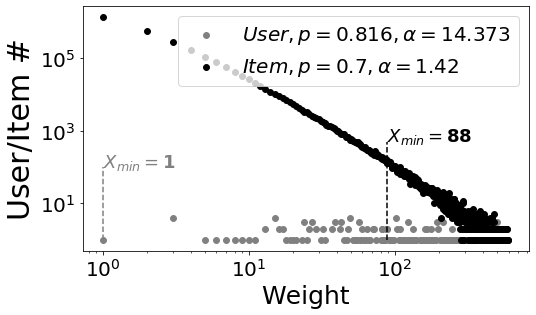

In [49]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
data1 = weiitem[100:]
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinduser,data1[:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 500, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],500),xytext=(xinduser[list(data2).index(xmin2)],500),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Item #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/ai_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# Social Network

# 1 Twitter

In [48]:
twitter = vu.dataset_sn("twitter", 20000000)

Start reading from twitter
finish degree calculate
finish weight calculate
finish 20000000 line input
finish init social network dataset


In [49]:
degitem, weiitem, xinditem = twitter.get_distribution("target")
deguser, weiuser, xinduser = twitter.get_distribution("source")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.5306294576446865 user alpha: 1.375912506017725 user xmin: 4.0
user p_value: 0.5367431504183167 user alpha: 2.1035138832921403 user xmin: 27.0


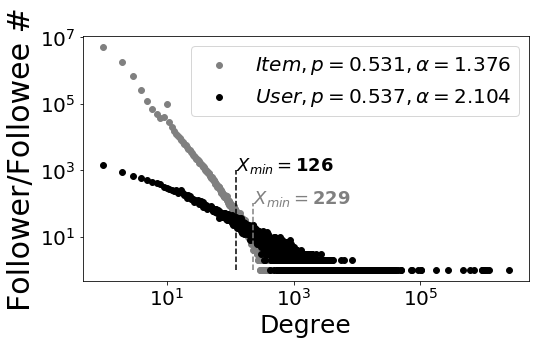

In [50]:
plt.rcParams['figure.figsize'] = (8, 4.5)

data1 = degitem
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('Follower/Followee #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/twitter_deg.png', dpi=300, bbox_inches='tight')
plt.show()

21192
user p_value: 0.83544638976061 user alpha: 9.935063463602015 user xmin: 19.0
user p_value: 0.8762925436730991 user alpha: 2.2301328636024462 user xmin: 8.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


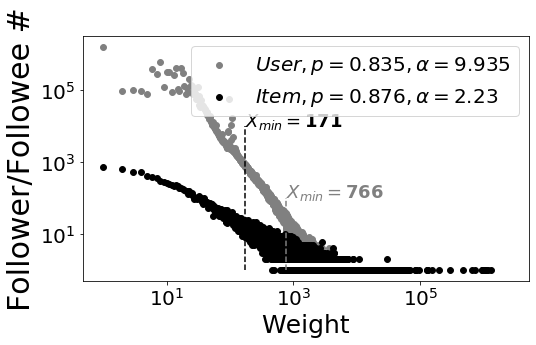

In [51]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
data1 = weiitem
results1 = powerlaw.Fit(data1[800:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:],data1[1:len(xinditem)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

data2 = weiuser
results2 = powerlaw.Fit(data2[10:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 10000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],10000),xytext=(xinduser[list(data2).index(xmin2)],10000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('Follower/Followee #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/twitter_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 2 Facebook-liked Forum Network Character

In [11]:
facebooklike_char = vu.dataset_rs("facebooklike_char")

Start reading from facebooklike_char
finish init recommendation system dataset


In [12]:
degitem, weiitem, xinditem = facebooklike_char.get_distribution("item")
deguser, weiuser, xinduser = facebooklike_char.get_distribution("user")

127
user p_value: 0.8027624218287034 user alpha: 2.36599595115291 user xmin: 1.0
100
user p_value: 0.7104095545005256 user alpha: 2.342644346911075 user xmin: 19.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


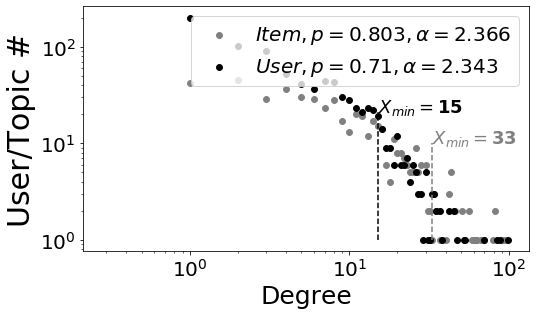

In [13]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem
results1 = powerlaw.Fit(data1[20:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 10, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],10),xytext=(xinditem[list(data1).index(xmin1)],10),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 21, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],21),xytext=(xinduser[list(data2).index(xmin2)],21),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/facebooklike_char_deg.png', dpi=300, bbox_inches='tight')
plt.show()

187809
100
user p_value: 0.6973607943914486 user alpha: 46.084220027780106 user xmin: 1.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


147153
user p_value: 0.4167594989830221 user alpha: 13.623877612815365 user xmin: 4.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


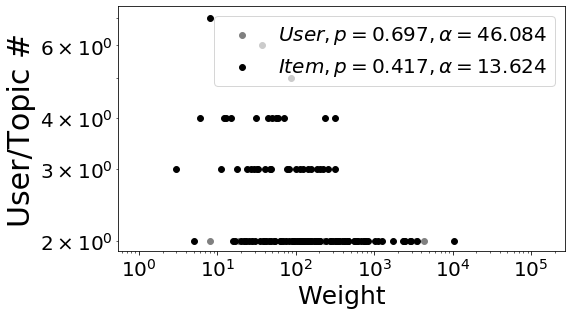

In [14]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
print(len(xinduser))
xind = []
for i in range(0,len(weiuser)):
    xind.append(i)
data1 = weiitem
results1 = powerlaw.Fit(data1[9:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xind[1:],data1[1:len(xind)], color='grey', marker='o', s=35)

#plt.vlines(xinditem[list(data1).index(xmin1)], 1, 10, colors ="grey", linestyles = "dashed", label="a")
#plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,10),xytext=(xinditem[list(data1).index(xmin1)],10),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2[2:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xind[1:],data2[1:len(xind)], color='black', marker='o', s=35)

#plt.vlines(xinduser[list(data2).index(xmin2)], 1, 2, colors ="black", linestyles = "dashed", label="b")
#plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],2),xytext=(xinduser[list(data2).index(xmin2)],2),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/facebooklike_char_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# 3 Facebook-liked Forum Network Messeage

In [31]:
facebooklike_msg = vu.dataset_rs("facebooklike_msg")

Start reading from facebooklike_msg
finish init recommendation system dataset


In [32]:
degitem, weiitem, xinditem = facebooklike_msg.get_distribution("item")
deguser, weiuser, xinduser = facebooklike_msg.get_distribution("user")

127
user p_value: 0.7397016246593593 user alpha: 1.7254602446250042 user xmin: 1.0
100
user p_value: 0.707084346949354 user alpha: 2.3397545462470983 user xmin: 19.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


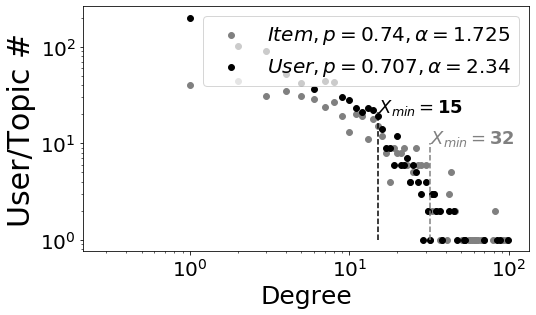

In [33]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem

results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 10, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],10),xytext=(xinditem[list(data1).index(xmin1)],10),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 21, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],21),xytext=(xinduser[list(data2).index(xmin2)],21),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/facebooklike_msg_deg.png', dpi=300, bbox_inches='tight')
plt.show()

943
943
user p_value: 0.9911359337670419 user alpha: 3.555635631037608 user xmin: 8.0
1793
user p_value: 0.9275265844380405 user alpha: 2.1063116432878175 user xmin: 3.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


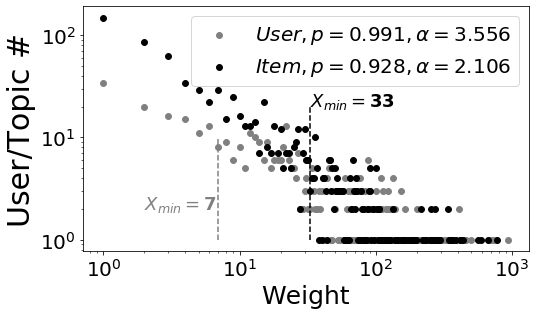

In [34]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
xind = []
for i in range(0,len(weiitem)):
    xind.append(i)
print(len(xind))
data1 = weiitem
results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xind[1:],data1[1:len(xind)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 10, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,10),xytext=(2,2),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xind[1:],data2[1:len(xind)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 20, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],20),xytext=(xinduser[list(data2).index(xmin2)],20),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/facebooklike_msg_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot Sample

## programming language

In [48]:
pl_r05 = vu.dataset_rs("programminglanguage_r05")

Start reading from programminglanguage_r05
1000000
2000000
3000000
4000000
5000000
6000000
7000000
finish init recommendation system dataset


In [65]:
degitem, weiitem, xinditem = pl_r05.get_distribution("item")
deguser, weiuser, xinduser = pl_r05.get_distribution("user")

469205
user p_value: 0.9329808725268921 user alpha: 2.631054119580552 user xmin: 4.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


719
user p_value: 0.7059281961410252 user alpha: 1.3711331340529924 user xmin: 338.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


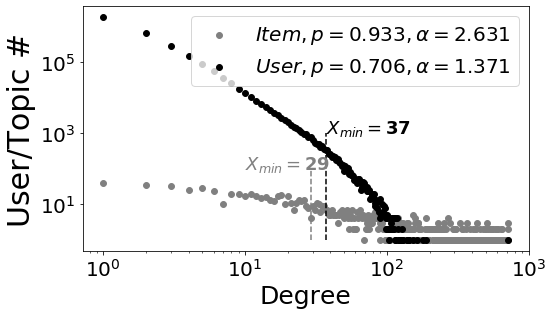

In [66]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem

results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(10,100),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/pl_r05_deg.png', dpi=300, bbox_inches='tight')
plt.show()

499583
499583
user p_value: 0.6378407808963662 user alpha: 12.532214983277179 user xmin: 1.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


719
user p_value: 0.6919379338872498 user alpha: 1.3834751953976057 user xmin: 485.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


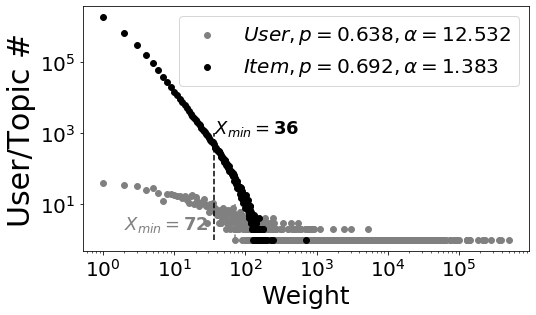

In [70]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
xind = []
for i in range(0,len(weiitem)):
    xind.append(i)
print(len(xind))
data1 = weiitem
results1 = powerlaw.Fit(data1[120:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xind[1:],data1[1:len(xind)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 10, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,10),xytext=(2,2),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xind[1:len(data2)],data2[1:], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/pl_r05_wei.png', dpi=300, bbox_inches='tight')
plt.show()

## algorithm

In [52]:
ag_r05 = vu.dataset_rs("algorithm_r05")

Start reading from algorithm_r05
1000000
2000000
3000000
finish init recommendation system dataset


In [53]:
degitem, weiitem, xinditem = ag_r05.get_distribution("item")
deguser, weiuser, xinduser = ag_r05.get_distribution("user")

257274
user p_value: 0.7733165344982322 user alpha: 8.678096965473463 user xmin: 1.0
148
user p_value: 0.7298298552223076 user alpha: 1.3938628544091254 user xmin: 767.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


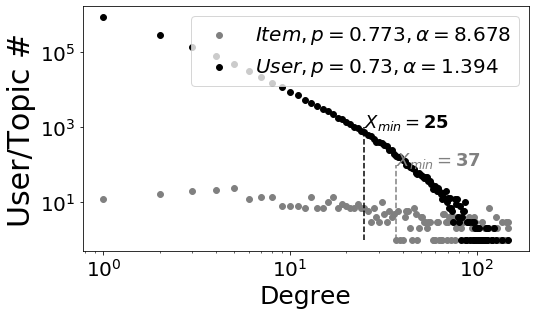

In [62]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem

results1 = powerlaw.Fit(data1[50:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/ag_r05_deg.png', dpi=300, bbox_inches='tight')
plt.show()

278849
278849
user p_value: 0.8479357651440429 user alpha: 2.860879144466346 user xmin: 2.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


190
user p_value: 0.8029156739037879 user alpha: 1.4160936435387623 user xmin: 886.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


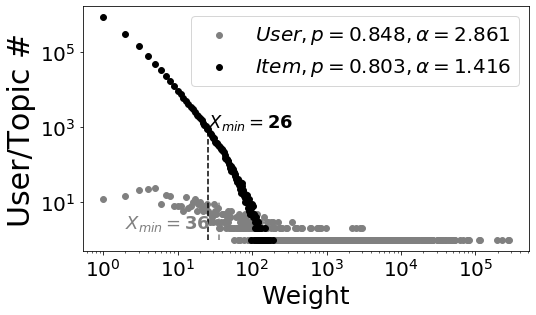

In [63]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
xind = []
for i in range(0,len(weiitem)):
    xind.append(i)
print(len(xind))
data1 = weiitem
results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xind[1:],data1[1:len(xind)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 10, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,10),xytext=(2,2),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xind[1:len(data2)],data2[1:], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/ag_r05_wei.png', dpi=300, bbox_inches='tight')
plt.show()

## artificialintelligence

In [81]:
ai_r05 = vu.dataset_rs("artificialintelligence_r05")

Start reading from artificialintelligence_r05
1000000
2000000
3000000
4000000
5000000
6000000
7000000
finish init recommendation system dataset


In [73]:
degitem, weiitem, xinditem = ai_r05.get_distribution("item")
deguser, weiuser, xinduser = ai_r05.get_distribution("user")

350671
user p_value: 0.6343081171417927 user alpha: 2.8459479699179093 user xmin: 2.0
598
user p_value: 0.5502759303521287 user alpha: 1.3508071547290297 user xmin: 261.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


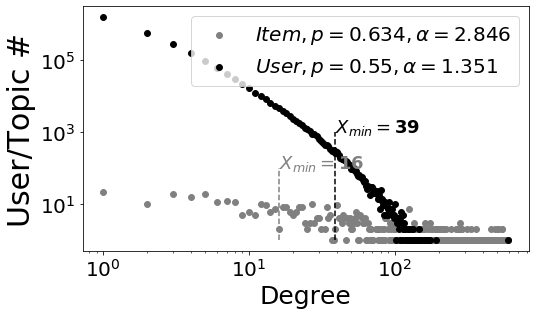

In [80]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem

results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/ai_r05_deg.png', dpi=300, bbox_inches='tight')
plt.show()

385210
385210
user p_value: 0.954890858257461 user alpha: 3.5244314850116623 user xmin: 5.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


598
user p_value: 0.5106990972341305 user alpha: 1.4232390468594929 user xmin: 739.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


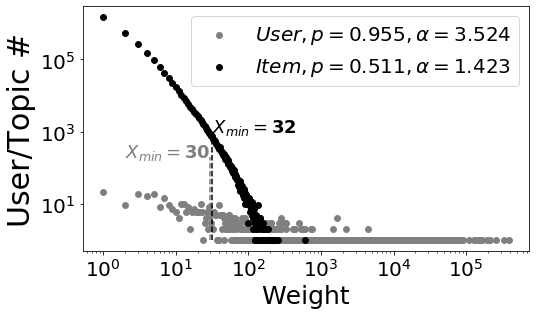

In [78]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
xind = []
for i in range(0,len(weiitem)):
    xind.append(i)
print(len(xind))
data1 = weiitem
results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xind[1:],data1[1:len(xind)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 200, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(30,200),xytext=(2,200),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xind[1:len(data2)],data2[1:], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 1000, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],1000),xytext=(xinduser[list(data2).index(xmin2)],1000),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/ai_r05_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# Add 2020/2/14

## facebooklike_msg(r05)

In [82]:
fb_r05 = vu.dataset_rs("facebooklike_msg_r05")

Start reading from facebooklike_msg_r05
finish init recommendation system dataset


In [83]:
degitem, weiitem, xinditem = fb_r05.get_distribution("item")
deguser, weiuser, xinduser = fb_r05.get_distribution("user")

127
user p_value: 0.7397016246593593 user alpha: 1.7254602446250042 user xmin: 1.0
100
user p_value: 0.707084346949354 user alpha: 2.3397545462470983 user xmin: 19.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


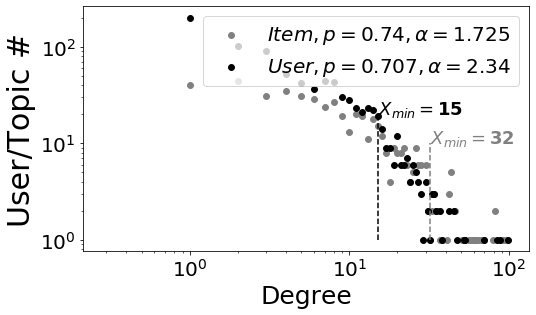

In [87]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem

results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 10, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],10),xytext=(xinditem[list(data1).index(xmin1)],10),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 20, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],20),xytext=(xinduser[list(data2).index(xmin2)],20),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/fb_r05_deg.png', dpi=300, bbox_inches='tight')
plt.show()

302
302
user p_value: 0.36356565149288866 user alpha: 1.9810618862463696 user xmin: 3.0
287
user p_value: 0.21113100392403394 user alpha: 2.5277865206744883 user xmin: 9.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


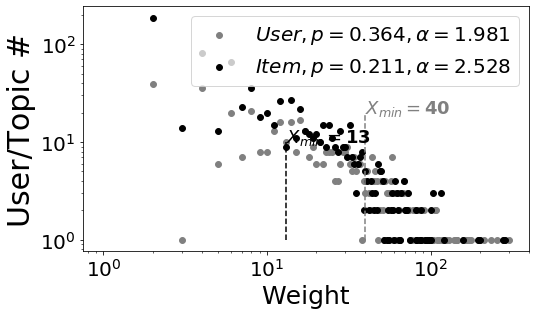

In [90]:
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
xind = []
for i in range(0,len(weiitem)):
    xind.append(i)
print(len(xind))
data1 = weiitem
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xind[1:],data1[1:len(xind)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 20, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],20),xytext=(xinditem[list(data1).index(xmin1)],20),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2[1:])
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xind[1:len(data2)],data2[1:], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 10, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],10),xytext=(xinduser[list(data2).index(xmin2)],10),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/fb_r05_wei.png', dpi=300, bbox_inches='tight')
plt.show()

# Add 2020/4/14 Social Network

## rating_m_f (libimseti)

In [54]:
libimseti_mf = vu.dataset_rs("libimseti_m_f")

Start reading from libimseti_m_f
1000000
2000000
3000000
finish init recommendation system dataset


In [55]:
degitem, weiitem, xinditem = libimseti_mf.get_distribution("item")
deguser, weiuser, xinduser = libimseti_mf.get_distribution("user")

19491
user p_value: 0.8188340045558209 user alpha: 2.2182676385573137 user xmin: 148.0
10353
user p_value: 0.8637788684625458 user alpha: 1.6109086218329012 user xmin: 44.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


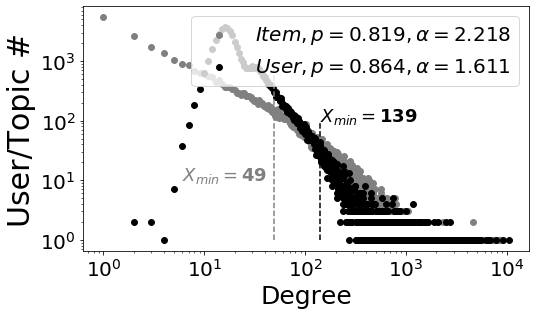

In [60]:
'''
degree
'''
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem

results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 1000, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(6,10),xytext=(6,10),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 100, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],100),xytext=(xinduser[list(data2).index(xmin2)],100),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/libimseti_m_f_deg.png', dpi=300, bbox_inches='tight')
plt.show()

194556
194556
user p_value: 0.30597146551834575 user alpha: 2.126266510354095 user xmin: 30.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


59278
user p_value: 0.4207072953844472 user alpha: 1.5847738333702064 user xmin: 2.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


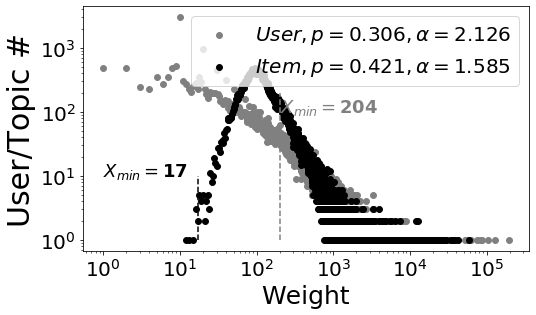

In [63]:
'''
weight
'''
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
xind = []
for i in range(0,len(weiitem)):
    xind.append(i)
print(len(xind))
data1 = weiitem
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xind[1:],data1[1:len(xind)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 200, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xind[1:len(data2)],data2[1:], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 10, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(1,10),xytext=(1,10),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/libimseti_m_f_wei.png', dpi=300, bbox_inches='tight')
plt.show()

## rating_f_m (libimseti)

In [49]:
libimseti_fm = vu.dataset_rs("libimseti_f_m")

Start reading from libimseti_f_m
1000000
2000000
3000000
4000000
5000000
6000000
7000000
finish init recommendation system dataset


In [50]:
degitem, weiitem, xinditem = libimseti_fm.get_distribution("item")
deguser, weiuser, xinduser = libimseti_fm.get_distribution("user")

21615
user p_value: 0.9455828021194438 user alpha: 2.308044662654039 user xmin: 312.0
13681


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.3289549214461931 user alpha: 1.4951893886862315 user xmin: 2.0


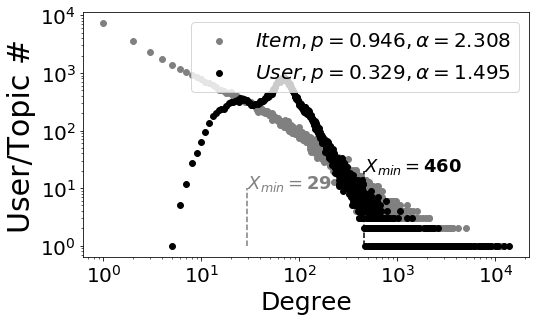

In [51]:
'''
degree
'''
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem

results1 = powerlaw.Fit(data1[1:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 10, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],10),xytext=(xinditem[list(data1).index(xmin1)],10),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 20, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],20),xytext=(xinduser[list(data2).index(xmin2)],20),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/libimseti_f_m_deg.png', dpi=300, bbox_inches='tight')
plt.show()

185211
185211
user p_value: 0.31570010210988464 user alpha: 2.158933711916779 user xmin: 31.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


87803


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


user p_value: 0.8006806795474194 user alpha: 1.6705891553437828 user xmin: 1.0


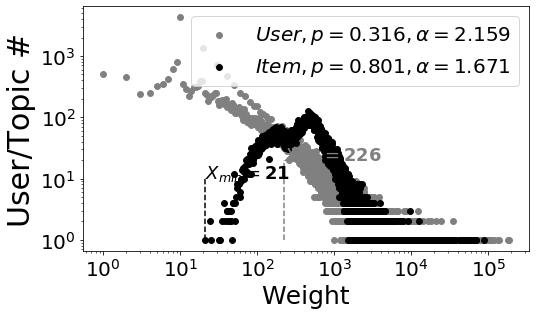

In [52]:
'''
weight
'''
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
xind = []
for i in range(0,len(weiitem)):
    xind.append(i)
print(len(xind))
data1 = weiitem
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xind[1:],data1[1:len(xind)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 20, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],20),xytext=(xinditem[list(data1).index(xmin1)],20),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xind[1:len(data2)],data2[1:], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 10, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],10),xytext=(xinduser[list(data2).index(xmin2)],10),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('User/Topic #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/libimseti_f_m_wei.png', dpi=300, bbox_inches='tight')
plt.show()

## rating_m_f (libimseti) r_05

In [84]:
libimseti_mf_r05 = vu.dataset_rs("libimseti_m_f_r05")

Start reading from libimseti_m_f_r05
1000000
2000000
3000000
finish init recommendation system dataset


In [85]:
degitem, weiitem, xinditem = libimseti_mf_r05.get_distribution("item")
deguser, weiuser, xinduser = libimseti_mf_r05.get_distribution("user")

19491


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.45101661468075216 user alpha: 2.2903388174694754 user xmin: 108.0
10353
user p_value: 0.8637788684625458 user alpha: 1.6109086218329012 user xmin: 44.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


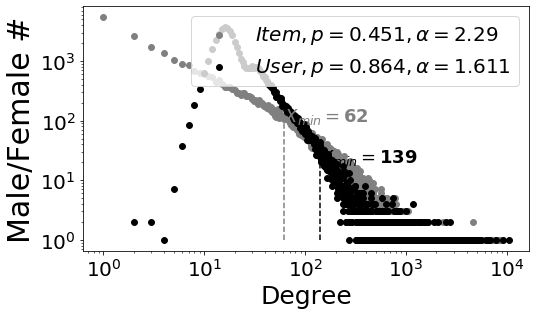

In [86]:
'''
degree
'''
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(degitem))
data1 = degitem

results1 = powerlaw.Fit(data1[3:])
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xinditem[1:len(xinduser)],data1[1:len(xinduser)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

print(len(deguser))
data2 = deguser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xinduser[1:len(xinduser)],data2[1:len(xinduser)], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 20, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],20),xytext=(xinduser[list(data2).index(xmin2)],20),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$Item, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$User, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Degree',fontsize=25)
plt.ylabel('Male/Female #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/libimseti_r05_deg_4_20.png', dpi=300, bbox_inches='tight')
plt.show()

97385
97385


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


user p_value: 0.7597185290094501 user alpha: 2.0787437641325353 user xmin: 82.0
32154


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.9759224680080777 user alpha: 1.5660740192968405 user xmin: 2.0


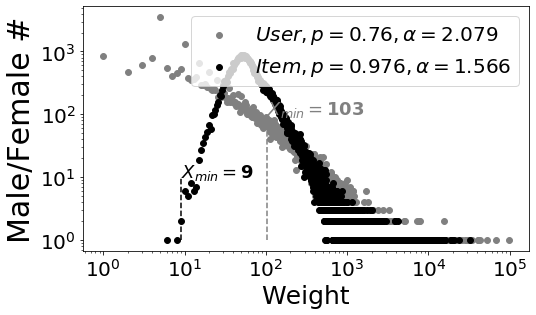

In [87]:
'''
weight
'''
plt.rcParams['figure.figsize'] = (8, 4.5)

print(len(weiitem))
xind = []
for i in range(0,len(weiitem)):
    xind.append(i)
print(len(xind))
data1 = weiitem
results1 = powerlaw.Fit(data1)
alpha1 = results1.power_law.alpha
xmin1 = results1.power_law.xmin
R1, p_value1 = results1.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value1, "user alpha:", alpha1, "user xmin:", xmin1)
# plt.plot(np.log(xinditem),np.log(degitem),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s1 = plt.plot(xinditem,degitem,'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s1 = plt.scatter(xind[1:],data1[1:len(xind)], color='grey', marker='o', s=35)

plt.vlines(xinditem[list(data1).index(xmin1)], 1, 100, colors ="grey", linestyles = "dashed", label="a")
plt.annotate(r'$X_{min} =$' + str(xinditem[list(data1).index(xmin1)]),xy=(xinditem[list(data1).index(xmin1)],100),xytext=(xinditem[list(data1).index(xmin1)],100),fontsize=18,weight='bold',color='grey')

print(len(weiuser))
data2 = weiuser
results2 = powerlaw.Fit(data2)
alpha2 = results2.power_law.alpha
xmin2 = results2.power_law.xmin
R2, p_value2 = results2.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value2, "user alpha:", alpha2, "user xmin:", xmin2)
# plt.plot(np.log(xinduser),np.log(deguser),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
# s2 = plt.plot(xinduser,data2,'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)
s2 = plt.scatter(xind[1:len(data2)],data2[1:], color='black', marker='o', s=35)

plt.vlines(xinduser[list(data2).index(xmin2)], 1, 10, colors ="black", linestyles = "dashed", label="b")
plt.annotate(r'$X_{min} =$' + str(xinduser[list(data2).index(xmin2)]),xy=(xinduser[list(data2).index(xmin2)],10),xytext=(xinduser[list(data2).index(xmin2)],10),fontsize=18,weight='bold',color='black')

# plt.ylim(0, math.pow(10,5))
# plt.yticks([math.pow(10,0), math.pow(10,1), math.pow(10,2), math.pow(10,3), math.pow(10,4), math.pow(10,5), math.pow(10,6)])

plt.legend(handles=[s1, s2], labels=[r'$User, p=$'+str(round(p_value1,3))+r'$, \alpha =$'+str(round(alpha1,3)), r'$Item, p=$'+str(round(p_value2,3))+r'$, \alpha =$'+str(round(alpha2,3))], loc='upper right', fontsize=20)

plt.xlabel('Weight',fontsize=25)
plt.ylabel('Male/Female #',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figure/libimseti_r05_wei_4_20.png', dpi=300, bbox_inches='tight')
plt.show()